In [ ]:
#목표 : 유튜브 인기 채널 및 영상 분석
#문제 정의 : Kaggle에서 유튜브 순위 데이터를 가져와 EDA를 통해 인기 채널을 순위를 시각화한다. 
#결론 : 50만 조회수 이상의 인기 영상 순위는 방탄소년단이 1위를 기록했고, 그다음순위로는 대부분 엔터테인먼트 회사들이 높은 채널이 있었음을 확인할 수 있었다. 
# 또한 WordExtractor 제목 단어 추출 및 빈도를 구한 결과 방탄 소년단과 한국이란 키워드 제목에 큰 관심을 가진것을 확인할 수 있었다.  

In [69]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [109]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [71]:
import warnings
warnings.filterwarnings("ignore")

In [72]:
#데이터 불러오기 (한글이 깨질경우, note++로 UTF-8 을 MS949로 바꿔주면 한글이 깨지지 않는다.)
KRvideo = pd.read_csv('C:/Users/hongm/Desktop/KRvideos - KRvideos.csv', engine='python', error_bad_lines='false')

In [73]:
KRvideo


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"ㅇㅣㅁㅕㅇㅂㅏㄱ 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34562,pj6YBBrO1sQ,18.14.06,장모님 가게한다고 1억만 달라는 아내 사이다카톡,이슈트래커,24,2018-06-10T23:00:01.000Z,[none],156439,383,58,308,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,False,False,False,- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...
34563,_Ne9ER-jr20,18.14.06,여러분~ 렌즈가 이렇게 위험합니다!!!ㅜㅜ _[이슈텔러],이슈텔러 issueTeller,24,2018-06-12T07:00:06.000Z,[none],130948,3121,55,988,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,False,False,False,"안녕하세요~! 이슈텔러 입니다~^^화, 목 오후 4시 / 토요일 오전 9시 재밌고 ..."
34564,xuOQq_fzEjk,18.14.06,2018년 6월 13일 아침 뉴스,News Express,25,2018-06-12T13:17:29.000Z,"한국|""북한""|""미국""|""중국""|""일본""|""러시아""|""한국뉴스""|""뉴스""|""국제뉴스...",62555,319,71,105,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,False,False,False,2018년 6월 13일 아침 뉴스등록되지 않은 구독자가 여기에서 내 새 채널을 지원...
34565,uXvjxeg08eQ,18.14.06,워너원 웃음 참기 영상 워너원 GO X-con.ver,원플,22,2018-06-11T11:57:20.000Z,"워너원|""워너원 고""|""워너원 GO""|""웃음참기""|""워너원 웃음참기""|""워너원 레전...",63306,2369,27,571,https://i.ytimg.com/vi/uXvjxeg08eQ/default.jpg,False,False,False,워너원 웃음 참기 영상 항상 좋아해주셔서 감사합니다8ㅅ8이번에는 얼마전에 있었던 원...


In [66]:
#row,column 수 파악하기
KRvideo.shape

(34567, 16)

In [67]:
KRvideo.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               3163
dtype: int64

In [78]:
#데이터 정리
df = KRvideo[['title','channel_title','views']]
df


,title,channel_title,views
0,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,156130
1,JSA 귀순 북한군 총격 부상,Edward,76533
2,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,421409
3,"ㅇㅣㅁㅕㅇㅂㅏㄱ 출국 현장, 놓치면 안되는 장면",미디어몽구,222850
4,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,84466
...,...,...,...
34562,장모님 가게한다고 1억만 달라는 아내 사이다카톡,이슈트래커,156439
34563,여러분~ 렌즈가 이렇게 위험합니다!!!ㅜㅜ _[이슈텔러],이슈텔러 issueTeller,130948
34564,2018년 6월 13일 아침 뉴스,News Express,62555
34565,워너원 웃음 참기 영상 워너원 GO X-con.ver,원플,63306


In [79]:
#view 내림차순 정렬 하기
df_sorted = df.sort_values(by='views', ascending =False)
df_sorted

,title,channel_title,views
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217
4678,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,100911567
4018,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,87450245
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,87430865
3750,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,84281319
...,...,...,...
4806,다니엘 생일 축하해!,여름감기 from OSW,3268
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,jungbub2013,3124
17414,애슐리 18년도 딸기축제 영상?,ashley wow,2919
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,시때메라 _,2623


In [82]:
#중복제거 
df_drop_sorted = df_sorted.drop_duplicates(['title', 'channel_title'],keep="first")
df_drop_sorted

,title,channel_title,views
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217
4018,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,87450245
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,87430865
28554,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,73432600
26391,VENOM - Official Trailer (HD),Sony Pictures Entertainment,49185287
...,...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),jungbub2013,3509
4806,다니엘 생일 축하해!,여름감기 from OSW,3268
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,jungbub2013,3124
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,시때메라 _,2623


In [81]:
#중복 삭제된 열의 갯수
len(df_sorted)-len(df_drop_sorted)

18138

In [86]:
#seaborn을 활용한 인기 채널 순위 시각화
#채널벌 조회수 합계
df_chanel_view_sum = df_drop_sorted.groupby(df['channel_title']).sum().sort_values(by='views', ascending =False)
df_chanel_view_sum

,views
channel_title,
ibighit,187757328
Marvel Entertainment,174161670
jypentertainment,118541123
YouTube Spotlight,113876217
MLG Highlights,78061767
...,...
메이플스토리2 MSG TV,3954
IfreeMusic,3725
여름감기 from OSW,3268


In [87]:
df_chanel_view=df_chanel_view_sum[:100]
df_chanel_view

,views
channel_title,
ibighit,187757328
Marvel Entertainment,174161670
jypentertainment,118541123
YouTube Spotlight,113876217
MLG Highlights,78061767
...,...
[Dorothy]도로시,11275375
필름에빠지다,11174308
The Late Show with Stephen Colbert,11157085


In [88]:
#인덱스 추가
df_chanel_view= df_chanel_view.reset_index()
df_chanel_view

,channel_title,views
0,ibighit,187757328
1,Marvel Entertainment,174161670
2,jypentertainment,118541123
3,YouTube Spotlight,113876217
4,MLG Highlights,78061767
...,...,...
95,[Dorothy]도로시,11275375
96,필름에빠지다,11174308
97,The Late Show with Stephen Colbert,11157085
98,신의한수,10866674


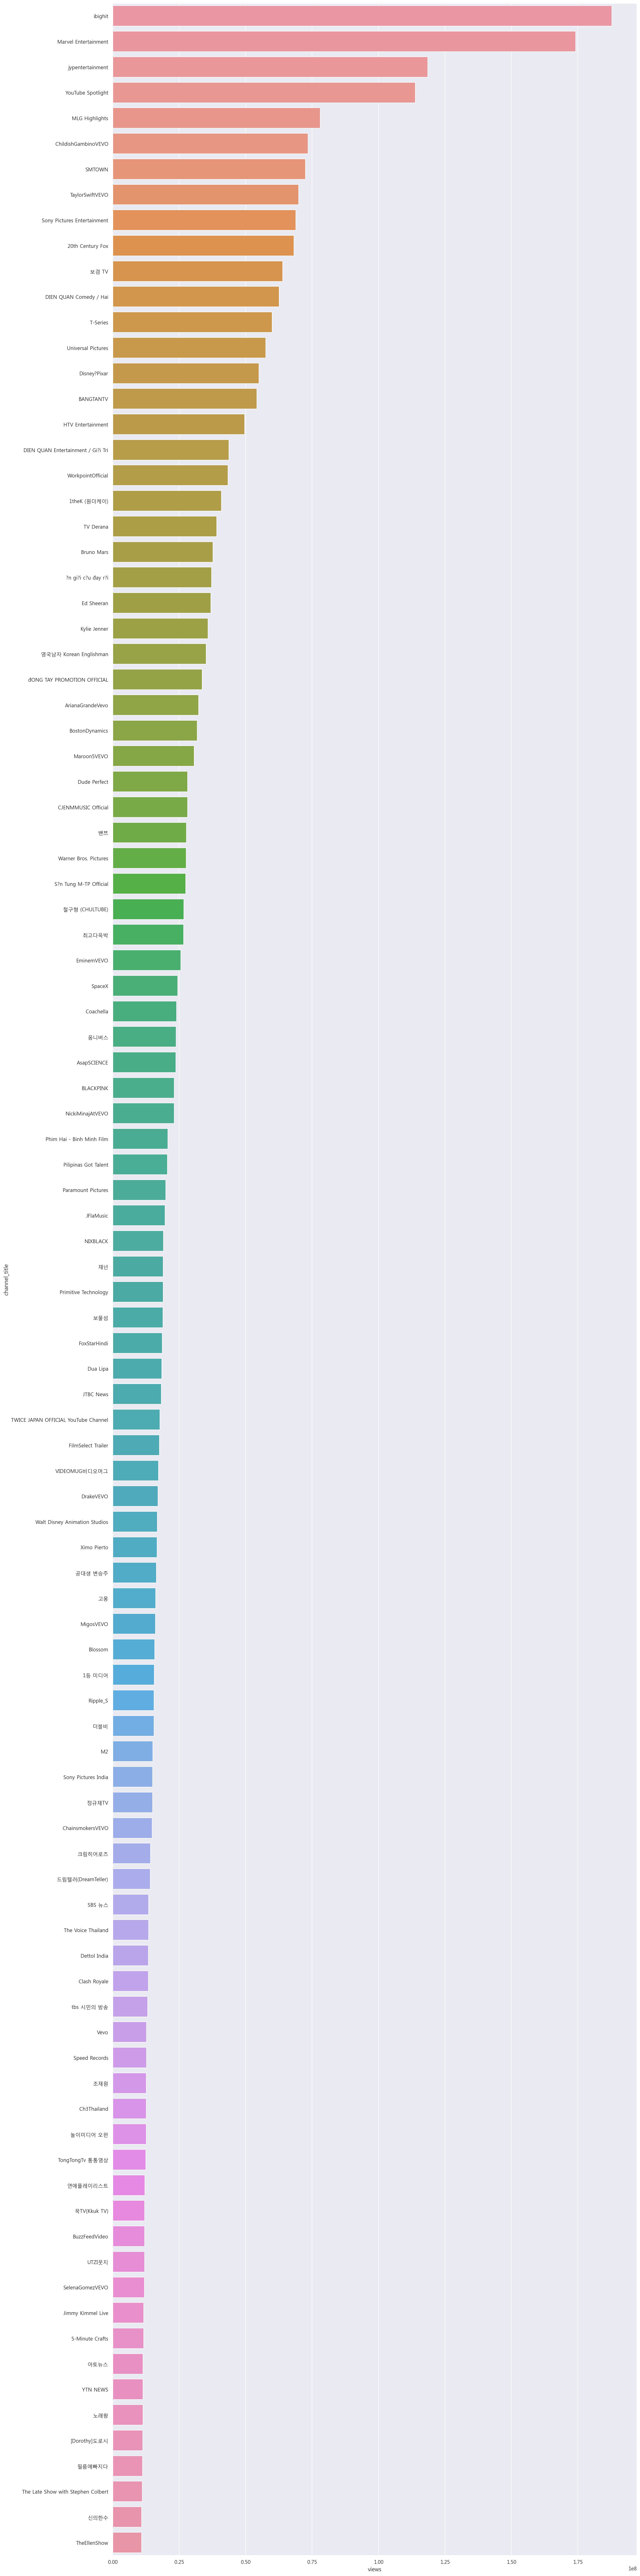

In [111]:
#seaborn barplot 사용하여 시각화하기

plt.figure(figsize =(20,100))
sns.barplot(x= 'views', y= 'channel_title' , data =df_chanel_view)


In [113]:
#인기 영상 키워드 분석 (제목 추출 및 정제)
KRvideo.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"ㅇㅣㅁㅕㅇㅂㅏㄱ 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


In [119]:
#제목,뷰만 가져오고 뷰 많은 순 정렬, 중복제거
df = KRvideo[['title','views']]
df_sorted = df.sort_values(by = "views", ascending= False).drop_duplicates(['title'] , keep= 'first')
df_sorted

,title,views
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,113876217
4018,Marvel Studios' Avengers: Infinity War Officia...,87450245
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865
28554,Childish Gambino - This Is America (Official V...,73432600
26391,VENOM - Official Trailer (HD),49185287
...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509
4806,다니엘 생일 축하해!,3268
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623


In [120]:
df_hot = df_sorted
df_hot

,title,views
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,113876217
4018,Marvel Studios' Avengers: Infinity War Officia...,87450245
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865
28554,Childish Gambino - This Is America (Official V...,73432600
26391,VENOM - Official Trailer (HD),49185287
...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509
4806,다니엘 생일 축하해!,3268
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623


In [122]:
#제목 Array로 조회
df_hot['title'].values

array(['YouTube Rewind: The Shape of 2017 | #YouTubeRewind',
       "Marvel Studios' Avengers: Infinity War Official Trailer",
       "BTS (방탄소년단) 'FAKE LOVE' Official MV", ...,
       '[홍익인간 인성교육] 7128강 산에 들어가고 싶다',
       '만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그', '소셜 잠금화면 앱 (달고나)'],
      dtype=object)

In [125]:
#정규표현식 (re)로 한글 데이터만 남기기
import re

df_hot['title_refined'] = df_hot['title'].apply(lambda x : re.sub('[^가-힣\s]','',x))
df_hot

,title,views,title_refined
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,113876217,
4018,Marvel Studios' Avengers: Infinity War Officia...,87450245,
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단
28554,Childish Gambino - This Is America (Official V...,73432600,
26391,VENOM - Official Trailer (HD),49185287,
...,...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509,홍익인간 인성교육 강 해외여행 증가
4806,다니엘 생일 축하해!,3268,다니엘 생일 축하해
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124,홍익인간 인성교육 강 산에 들어가고 싶다
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623,만취 브이로그서프라이즈 생일 파티실시간 현실 술판여자셋 일상일상브이로그


In [134]:
# 공백만 있는 row 삭제
df_hot = df_hot[df_hot['title_refined'].apply(lambda x: re.sub('[^가-힣]','',x)) !='']
df_hot

,title,views,title_refined,tokenized
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단,[방탄소년단]
2788,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,30583293,방탄소년단,[방탄소년단]
28605,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,22612931,방탄소년단,[방탄소년단]
13442,Red Velvet 레드벨벳 'Bad Boy' MV,19392316,레드벨벳,[레드벨벳]
17879,j-hope 'Daydream (백일몽)' MV,10695328,백일몽,[백일몽]
...,...,...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509,홍익인간 인성교육 강 해외여행 증가,"[홍익인간, 인성교육, 강, 해외, 증가]"
4806,다니엘 생일 축하해!,3268,다니엘 생일 축하해,"[다니엘, 생일, 축하]"
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124,홍익인간 인성교육 강 산에 들어가고 싶다,"[홍익인간, 인성교육, 강, 산에, 들어, 싶다]"
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623,만취 브이로그서프라이즈 생일 파티실시간 현실 술판여자셋 일상일상브이로그,"[만취, 브이로그, 생일, 파티, 현실, 술판여자셋, 일상]"


In [129]:
#인기 영상 키워드 분석하기 - 제목 단어 추출  및 빈도 수 구하기
!pip install soynlp

In [130]:
#wordExtractor로 단어 점수 학습(통계 기반 단어 추출기)
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency =10,
    min_cohesion_forward=0.05,
    min_right_branching_entropy=0.0
)
word_extractor.train(df_hot['title_refined'].values) # list of str or like
words = word_extractor.extract()
words

training was done. used memory 0.613 Gb
all cohesion probabilities was computed. # words = 4814
all branching entropies was computed # words = 15729
all accessor variety was computed # words = 15729


{'장': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=2.858147535334567, right_branching_entropy=4.652002489202849, left_accessor_variety=71, right_accessor_variety=171, leftside_frequency=326, rightside_frequency=1036),
 '복': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=2.9812380595967753, right_branching_entropy=1.5131465211967492, left_accessor_variety=22, right_accessor_variety=7, leftside_frequency=118, rightside_frequency=49),
 '독': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=2.6120883078682566, right_branching_entropy=1.8283783161787328, left_accessor_variety=15, right_accessor_variety=11, leftside_frequency=81, rightside_frequency=57),
 '풀': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=2.935495444867332, right_branching_entropy=0.9453791866710968, left_accessor_variety=33, right_accessor_variety=6, leftside_frequency=188, rightside_frequency=26),
 '압': Scores(cohesion_forward=0

In [131]:
#LTokenizer로 L-R 분리(Ltokenizer vs MaxScoreTokenizer 차이점의 띄어쓰기가 잘 되어 있는지 아닌지에 따라, L = 의미있는 명사)

from soynlp.tokenizer import LTokenizer
cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

In [135]:
df_hot['tokenized'] = df_hot['title_refined'].apply(lambda x :tokenizer.tokenize(x , remove_r=True))
df_hot

,title,views,title_refined,tokenized
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단,[방탄소년단]
2788,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,30583293,방탄소년단,[방탄소년단]
28605,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,22612931,방탄소년단,[방탄소년단]
13442,Red Velvet 레드벨벳 'Bad Boy' MV,19392316,레드벨벳,[레드벨벳]
17879,j-hope 'Daydream (백일몽)' MV,10695328,백일몽,[백일몽]
...,...,...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509,홍익인간 인성교육 강 해외여행 증가,"[홍익인간, 인성교육, 강, 해외, 증가]"
4806,다니엘 생일 축하해!,3268,다니엘 생일 축하해,"[다니엘, 생일, 축하]"
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124,홍익인간 인성교육 강 산에 들어가고 싶다,"[홍익인간, 인성교육, 강, 산에, 들어, 싶다]"
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623,만취 브이로그서프라이즈 생일 파티실시간 현실 술판여자셋 일상일상브이로그,"[만취, 브이로그, 생일, 파티, 현실, 술판여자셋, 일상]"


In [138]:
#단어 빈도 수 구하기

df_hot_top = df_hot[df_sorted['views'] >500000]
df_hot_top

,title,views,title_refined,tokenized
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단,[방탄소년단]
2788,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,30583293,방탄소년단,[방탄소년단]
28605,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,22612931,방탄소년단,[방탄소년단]
13442,Red Velvet 레드벨벳 'Bad Boy' MV,19392316,레드벨벳,[레드벨벳]
17879,j-hope 'Daydream (백일몽)' MV,10695328,백일몽,[백일몽]
...,...,...,...,...
32727,"중딩 커플의 키스, 친구들한텐 비밀인 이유 [진짜사랑 리턴즈2 11-1]",502090,중딩 커플의 키스 친구들한텐 비밀인 이유 진짜사랑 리턴즈,"[중딩, 커플, 키스, 친구, 비밀, 이유, 진짜, 리턴즈]"
3876,"문 대통령, JSA 장병 초청... '명예 소령' 이국종 교수도 참석/비디오머그",501508,문 대통령 장병 초청 명예 소령 이국종 교수도 참석비디오머그,"[문, 대통령, 장병, 초청, 명예, 소령, 이국종, 교수, 참석]"
11219,윤식당2 방문한 우크라이나 블로거가 공개하는 비하인드 및 인터뷰,501469,윤식당 방문한 우크라이나 블로거가 공개하는 비하인드 및 인터뷰,"[윤식당, 방문, 우크라이나, 블로거가, 공개, 비하인드, 및, 인터뷰]"
20576,"♥좋아싫어해♥(スキキライ) 태쁘 & 엔찬 커플송! (커버송, Cover) [Pre...",500972,좋아싫어해 태쁘 엔찬 커플송 커버송 쁘띠허브,"[좋아, 태쁘, 엔찬, 커플, 커버, 쁘띠허브]"


In [218]:
#tokenized 단어 한 배열에 담기
words=[]
for i in df_hot_top['tokenized'].values:
    for k in i :
        words.append(k)
words



['방탄소년단',
 '방탄소년단',
 '방탄소년단',
 '레드벨벳',
 '백일몽',
 '방탄소년단',
 '방탄소년단',
 '여자친구',
 '밤',
 '방탄소년단',
 '레드벨벳',
 '피카부',
 '방탄소년단',
 '방탄소년단',
 '워너원',
 '약속',
 '선미',
 '주인공',
 '워너원',
 '부메랑',
 '엑소',
 '종현',
 '빈소',
 '방탄소년단',
 '등',
 '애도',
 '이어져',
 '샤이니',
 '종현',
 '빛이',
 '나',
 '워너원',
 '켜줘',
 '종현',
 '발인',
 '음악에',
 '열정',
 '넘쳤던',
 '가수',
 '영면동료들',
 '마지막',
 '길',
 '눈물',
 '배웅',
 '샤이니',
 '빙글뱅글',
 '워너원',
 '사랑을',
 '했다',
 '샤이니',
 '데리',
 '가',
 '텔레콤',
 '연아와',
 '성빈이의',
 '이야기',
 '현아',
 '방예담',
 '프리',
 '배틀',
 '시간',
 '능력',
 '가진',
 '남자',
 '여성에게',
 '한',
 '행동',
 '방탄소년단',
 '샤이니',
 '종현',
 '빈소',
 '찾은',
 '소녀시대',
 '써니',
 '멈추',
 '않는',
 '눈물',
 '동영상',
 '단독',
 '조현민',
 '에이',
 '폭언',
 '음성',
 '공개',
 '방탄소년단',
 '방탄',
 '꽃',
 '길',
 '직캠',
 '트와이스',
 '직캠',
 '김정은',
 '웃게',
 '한',
 '제주',
 '오연준의',
 '바람',
 '불어오는',
 '곳비디오머그',
 '내',
 '여자친구',
 '개',
 '쩌는듯',
 '엔시티',
 '드림',
 '아내',
 '낯선사람',
 '차에',
 '태우면',
 '안되는',
 '이유',
 '레드벨벳',
 '피카부',
 '방탄소년단',
 '여자',
 '시청자',
 '빵터',
 '선수들',
 '대화',
 '이엑스아이디',
 '내일',
 '뮤직',
 '비디오',
 '가요대축제',
 '방탄소년단',
 '병맛더빙',
 '급식',
 '콜롬비아나',

In [217]:
#counter로 words 빈도 수 파악
from collections import Counter
count= Counter(words)
words_dict = dict(count)
print(words_dict)

{'방탄소년단': 50, '레드벨벳': 17, '백일몽': 1, '여자친구': 17, '밤': 4, '피카부': 5, '워너원': 10, '약속': 3, '선미': 3, '주인공': 2, '부메랑': 1, '엑소': 2, '종현': 36, '빈소': 10, '등': 5, '애도': 1, '이어져': 1, '샤이니': 22, '빛이': 1, '나': 2, '켜줘': 1, '발인': 5, '음악에': 1, '열정': 1, '넘쳤던': 1, '가수': 2, '영면동료들': 1, '마지막': 14, '길': 3, '눈물': 21, '배웅': 3, '빙글뱅글': 2, '사랑을': 5, '했다': 7, '데리': 3, '가': 3, '텔레콤': 1, '연아와': 1, '성빈이의': 1, '이야기': 13, '현아': 1, '방예담': 2, '프리': 2, '배틀': 3, '시간': 11, '능력': 2, '가진': 2, '남자': 18, '여성에게': 1, '한': 17, '행동': 3, '찾은': 2, '소녀시대': 5, '써니': 1, '멈추': 2, '않는': 2, '동영상': 3, '단독': 3, '조현민': 4, '에이': 3, '폭언': 1, '음성': 4, '공개': 15, '방탄': 4, '꽃': 4, '직캠': 21, '트와이스': 11, '김정은': 15, '웃게': 1, '제주': 5, '오연준의': 1, '바람': 4, '불어오는': 3, '곳비디오머그': 1, '내': 7, '개': 7, '쩌는듯': 1, '엔시티': 3, '드림': 1, '아내': 10, '낯선사람': 1, '차에': 1, '태우면': 1, '안되는': 9, '이유': 51, '여자': 31, '시청자': 3, '빵터': 4, '선수들': 5, '대화': 1, '이엑스아이디': 1, '내일': 3, '뮤직': 2, '비디오': 1, '가요대축제': 2, '병맛더빙': 5, '급식': 3, '콜롬비아나': 1, '김성태': 9, '빡친': 4, '손석희': 4, '결국': 6, '

In [212]:
#딕셔너리 정렬 내림차순
words_dict_sorted = sorted(words_dict.items(), 
                    reverse = True, key = lambda item : item[1])
words_dict_sorted

[('이유', 51),
 ('한국', 51),
 ('방탄소년단', 50),
 ('반응', 41),
 ('먹방', 40),
 ('종현', 36),
 ('충격', 36),
 ('영상', 33),
 ('여자', 31),
 ('평창', 30),
 ('진짜', 28),
 ('친구', 24),
 ('샤이니', 22),
 ('눈물', 21),
 ('직캠', 21),
 ('아이', 21),
 ('노선영', 20),
 ('일본', 20),
 ('수', 20),
 ('영화', 19),
 ('선수', 19),
 ('남자', 18),
 ('문재인', 18),
 ('김보름', 18),
 ('올림픽', 18),
 ('일', 18),
 ('레드벨벳', 17),
 ('여자친구', 17),
 ('한', 17),
 ('처음', 17),
 ('평창올림픽', 17),
 ('밴쯔', 17),
 ('모습', 16),
 ('드디어', 16),
 ('대박', 16),
 ('레전드', 16),
 ('우리', 16),
 ('공개', 15),
 ('김정은', 15),
 ('대통령', 15),
 ('북한', 15),
 ('카톡', 15),
 ('경기', 15),
 ('마지막', 14),
 ('논란', 14),
 ('안희정', 14),
 ('모음', 14),
 ('뉴스', 14),
 ('결혼', 14),
 ('하이라이트', 14),
 ('공대생', 14),
 ('편', 14),
 ('역관광', 14),
 ('이야기', 13),
 ('기자', 13),
 ('역대급', 13),
 ('변승주', 13),
 ('고작', 13),
 ('년', 13),
 ('없는', 13),
 ('회', 13),
 ('가장', 12),
 ('미친', 12),
 ('있는', 12),
 ('손흥민', 12),
 ('사건', 12),
 ('엄마', 12),
 ('외국인', 12),
 ('왜', 12),
 ('철구', 12),
 ('하는', 12),
 ('시즌', 12),
 ('시간', 11),
 ('트와이스', 11),
 ('만원', 11),

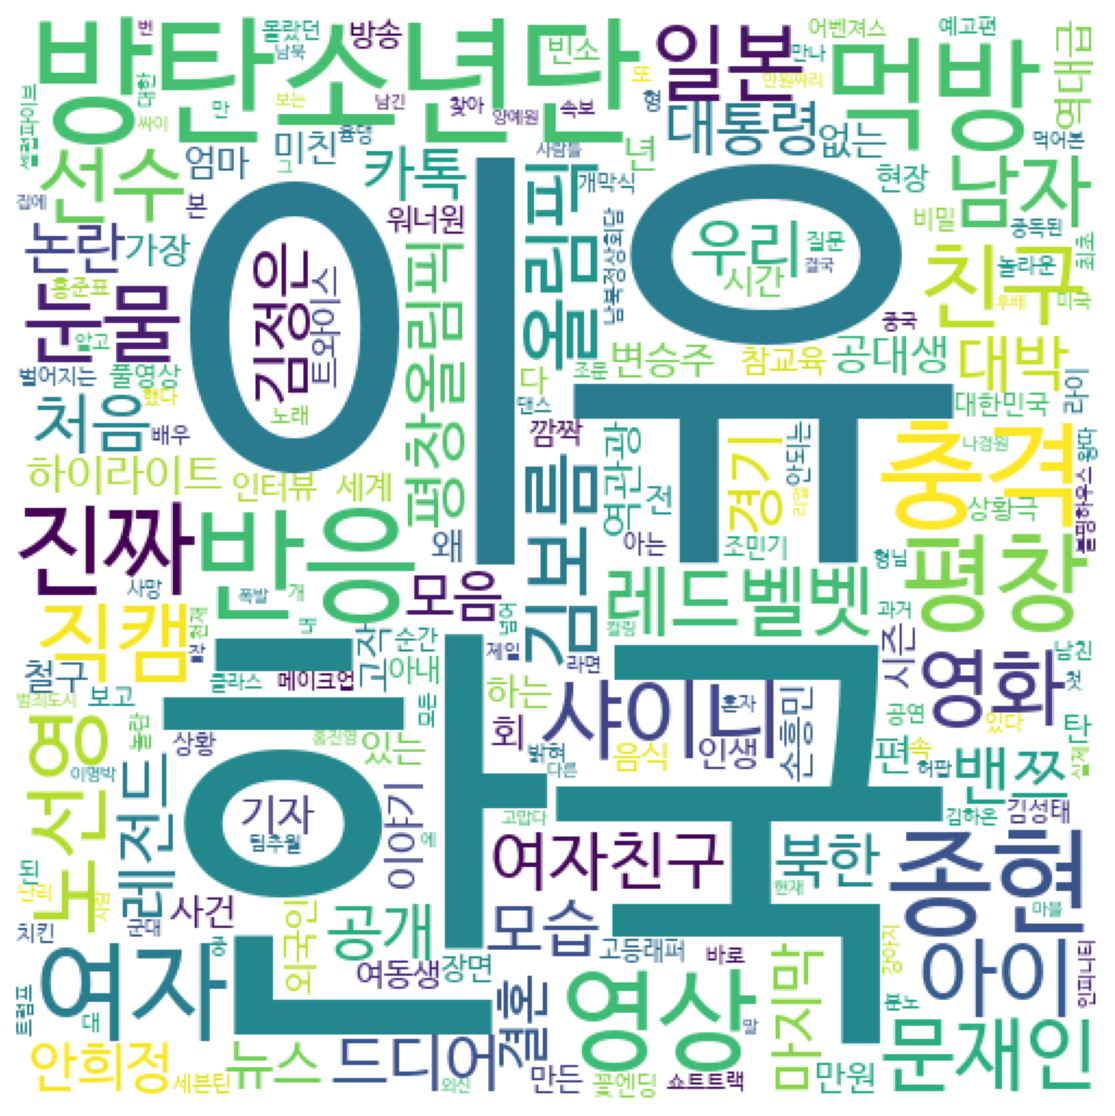

In [221]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path='C:/Users/hongm/Desktop/NanumBarunGothic.ttf', background_color='white', width=500, height=500).generate_from_frequencies(words_dict)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [220]:
stopwords = {'수','한','일','온','화'}
for word in stopwords:
    words_dict.pop(word)